<a href="https://colab.research.google.com/github/Asedizzle/Machine-Learning-Algos/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Here I am going to be practicing Simple Linear regression and implementing preprocessing tecniques I have learnt as needed

Data source:
Abhishek14398. (2023, January 10). Salary Dataset: Simple linear regression [Data set]. Kaggle. https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

The line of best fit produced by linear regression is the line that minimizes the sum of the squared differences (errors) between the observed data points and expected data points.

 It chooses the line that results in the smallest possible total squared error.

In [2]:
url = 'https://raw.githubusercontent.com/Asedizzle/Machine-Learning-Algos/main/Salary_dataset.csv'

In [3]:
df = pd.read_csv(url)
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.shape #very small dataset as you see but little drops make a tiny ocean, let's practice

(30, 3)

In [5]:
#checking for missing data
df.isna().sum() #nothing missing


,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [6]:
#dropping unneccessary column
df = df.drop(columns='Unnamed: 0')
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


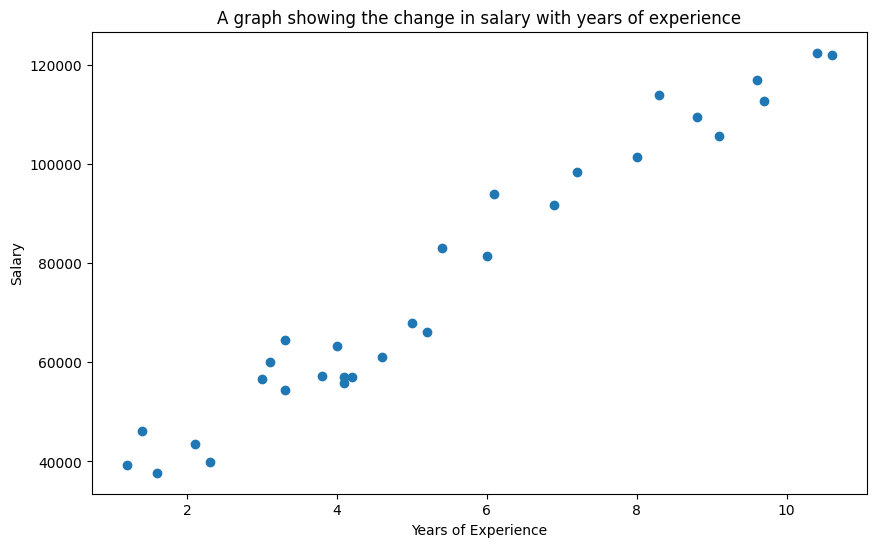

In [7]:
#Visualizing to ensure no assumptions of regression are violated and to see if I need to log or smth

plt.figure(figsize=(10,6))
plt.scatter(df["YearsExperience"], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('A graph showing the change in salary with years of experience')
plt.show()

#Confirmed very obvious linear relationship

No missing data, no need for scaling with just these 2 columns.Let's get right into splitting

In [8]:
#determining predictor and outcome variables
X = df.drop(columns="Salary", axis=1)
y = df["Salary"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
lr  = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
#Comparing some predicted values with actual values
y_pred = lr.predict(X_test)
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [12]:
y_test

,Salary
27,112636.0
15,67939.0
23,113813.0
17,83089.0
8,64446.0
9,57190.0


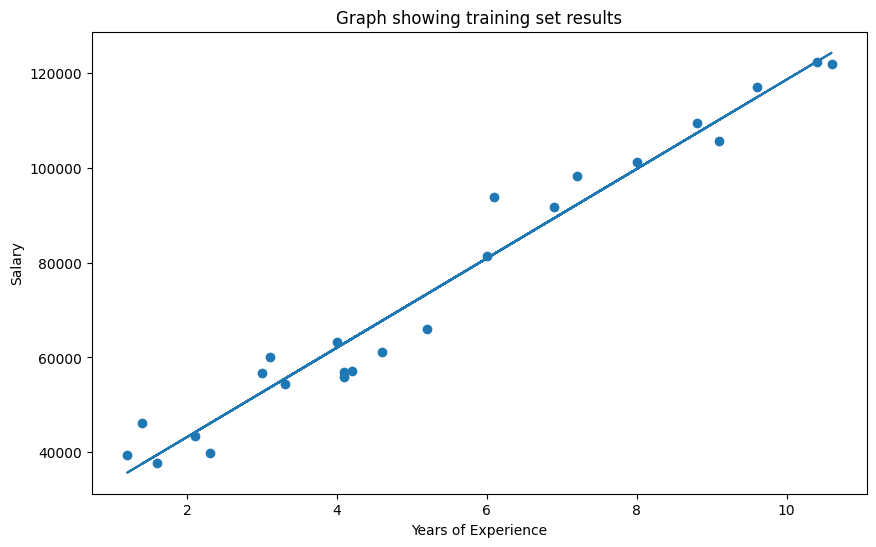

In [13]:
#Visualizing the training set results
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train))
plt.title('Graph showing training set results')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

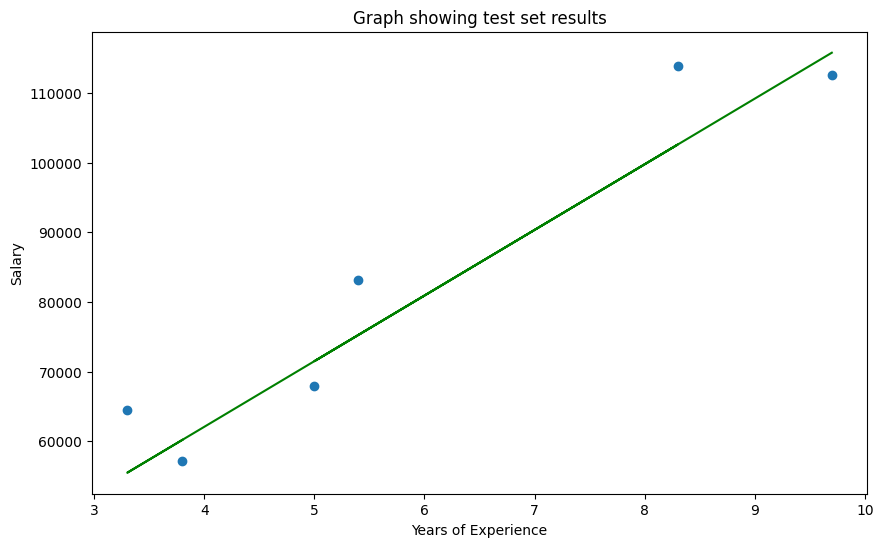

In [30]:
#Visualizing the test set results
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred,color='green')
plt.title('Graph showing test set results')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Using R squared to find out the proportion of the variance in the dependent variable that can be explained by the predictor. That is how much of the change in y can be accounted for by x

In [15]:
#Getting the r squared score
score = r2_score(y_test,y_pred)
score

0.9024461774180497

Interpretation of this r2 score: above 90% of the changes in salary can be accounted for by differences in years of experience. Here r2 is fine because we do not have multiple predictors otherwise adjusted r2 would be a fairer metric.

Let's go on to find the mean squared error. It is a metric used to evaluate linear models. Here the lower the value, the better the model, we'd compare with a decision tree regressor

MSE measures how far a model's predictions are from the actual values, on average

A model with a lower MSE has a  line of 'better' fit and is a better predictor of the data.

In [16]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test,y_pred)
print(f'The MSE for Linear Regression model is {lr_mse}')

The MSE for Linear Regression model is 49830096.855908394


In [17]:
from sklearn.tree import DecisionTreeRegressor
tm = DecisionTreeRegressor(random_state=42)#accounting for internal randomness in model so i get consistent results on repeated runs
tm.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
tr_score = tm.score(X_test, y_test)
tr_score

0.8021759743735162

In [21]:
t_pred = tm.predict(X_test)

In [22]:

from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(y_test,t_pred)
print(f'The MSE for Decision Tree model is {tr_mse}')

The MSE for Decision Tree model is 101047709.83333333


Linear Regression was a better predictor. Okay now let's get the equation and interpretation

In [29]:
#find model coefficient and intercept
coef = lr.coef_
coef = np.round(coef,2)
cept = lr.intercept_
cept = np.round(cept, 2)
print(f'y = {cept} + {coef[0]} * Experience')

y = 24380.2 + 9423.82 * Experience


I will assume currency is in dollars
Interpretation :
This means that for every additional year of experience, a person's salary is expected to go up by about 9,424.82 dollars, starting from a base salary of $24,380.2for someone with no experience.
